<a href="https://colab.research.google.com/github/fahmiardiansyahh/projecttokohelm/blob/master/Ekseperimen_UCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Experimen dengan korelasi person

In [554]:
# import package
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support,roc_auc_score)

In [555]:
# Load ucp 
df = pd.read_csv('Dataset1.csv')
df = df.fillna(df.mean())
df.head(10)

,Project_No,Simple Actors,Average Actors,Complex Actors,UAW,Simple UC,Average UC,Complex UC,UUCW,TCF,ECF,Real_P20,Real_Effort_Person_Hours
0,1,1.000000,1,2,9,6,10,15,355,81,84,3985,7970
1,2,1.000000,2,1,8,4,20,15,445,99,99,3981,7962
2,3,0.000000,0,3,9,1,5,20,355,103,8,39675,7935
3,4,0.000000,1,2,8,5,10,15,350,9,91,39025,7805
4,5,1.000000,2,1,8,1,10,16,345,9,91,3879,7758
5,6,2.000000,0,2,8,1,13,14,345,99,99,38215,7643
6,7,0.000000,2,1,7,3,18,15,420,94,102,3766,7532
7,8,0.000000,1,2,8,0,16,12,340,103,8,37255,7451
8,9,0.714286,1,2,8,2,10,15,335,94,102,37245,7449
9,10,4.000000,0,1,7,4,14,17,415,1025,98,37135,7427


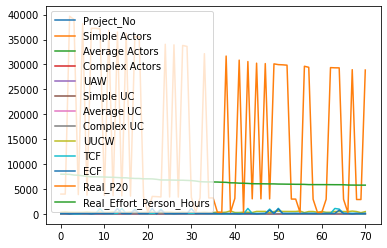

In [556]:
## Load Fitur
df.plot()
plt.show()

In [557]:
# df.drop(df.columns[[0]], axis = 1, inplace = True)
# X = df.drop("Real_Effort_Person_Hours",axis=1)   #Feature Matrix
# y = df["Real_Effort_Person_Hours"] 
max_corr_features = ['Average Actors','Complex Actors', 'UAW','Simple UC','Average UC','Complex UC','UUCW','UAW','TCF','ECF']
X = df[max_corr_features]
y = df['Real_Effort_Person_Hours']

In [558]:
X

,Average Actors,Complex Actors,UAW,Simple UC,Average UC,Complex UC,UUCW,UAW,TCF,ECF
0,1,2,9,6,10,15,355,9,81,84
1,2,1,8,4,20,15,445,8,99,99
2,0,3,9,1,5,20,355,9,103,8
3,1,2,8,5,10,15,350,8,9,91
4,2,1,8,1,10,16,345,8,9,91
...,...,...,...,...,...,...,...,...,...,...
66,3,4,18,2,18,18,460,18,105,95
67,2,4,17,1,23,22,565,17,103,8
68,2,5,19,5,30,10,475,19,95,92
69,0,2,6,5,15,5,250,6,1,92


In [559]:
y

0     7970
1     7962
2     7935
3     7805
4     7758
      ... 
66    5800
67    5791
68    5782
69    5778
70    5775
Name: Real_Effort_Person_Hours, Length: 71, dtype: int64

In [560]:
X.corr()

,Average Actors,Complex Actors,UAW,Simple UC,Average UC,Complex UC,UUCW,UAW,TCF,ECF
Average Actors,1.000000,0.125035,0.473170,0.009976,0.424390,0.258688,0.453504,0.473170,-0.140921,-0.162250
Complex Actors,0.125035,1.000000,0.915231,0.370517,0.547672,0.474949,0.749159,0.915231,0.051822,-0.055361
UAW,0.473170,0.915231,1.000000,0.349400,0.647346,0.539216,0.854489,1.000000,0.030308,-0.071651
Simple UC,0.009976,0.370517,0.349400,1.000000,0.272154,0.105019,0.406694,0.349400,0.011057,0.051232
Average UC,0.424390,0.547672,0.647346,0.272154,1.000000,-0.040828,0.621474,0.647346,0.065448,0.069455
Complex UC,0.258688,0.474949,0.539216,0.105019,-0.040828,1.000000,0.741882,0.539216,0.045766,-0.029189
UUCW,0.453504,0.749159,0.854489,0.406694,0.621474,0.741882,1.000000,0.854489,0.075887,0.028664
UAW,0.473170,0.915231,1.000000,0.349400,0.647346,0.539216,0.854489,1.000000,0.030308,-0.071651
TCF,-0.140921,0.051822,0.030308,0.011057,0.065448,0.045766,0.075887,0.030308,1.000000,0.437741
ECF,-0.162250,-0.055361,-0.071651,0.051232,0.069455,-0.029189,0.028664,-0.071651,0.437741,1.000000


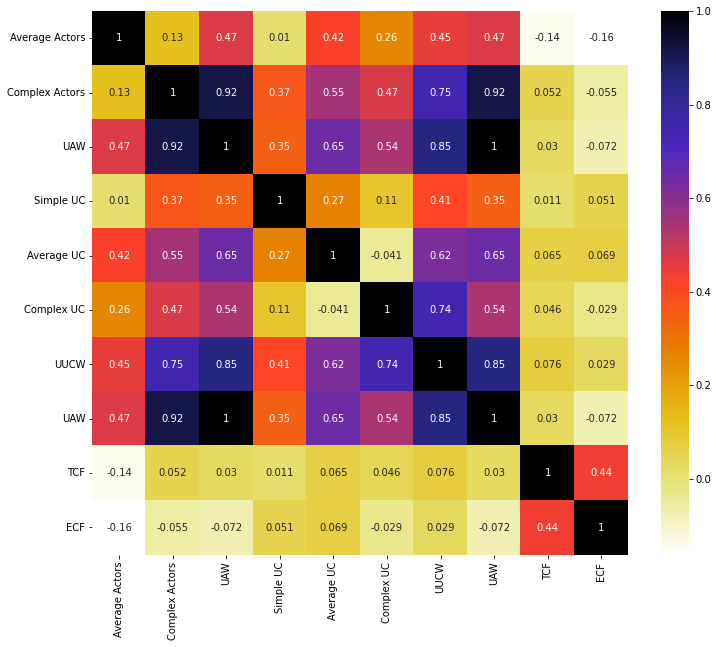

In [561]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [562]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [563]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

2

In [564]:
corr_features

{'UAW', 'UUCW'}

In [565]:
max_corr_features = ['Complex Actors','Average UC','Complex UC','UAW','UUCW']
X = df[max_corr_features]
y = df['Real_Effort_Person_Hours']

In [566]:
X

,Complex Actors,Average UC,Complex UC,UAW,UUCW
0,2,10,15,9,355
1,1,20,15,8,445
2,3,5,20,9,355
3,2,10,15,8,350
4,1,10,16,8,345
...,...,...,...,...,...
66,4,18,18,18,460
67,4,23,22,17,565
68,5,30,10,19,475
69,2,15,5,6,250


In [567]:
y

0     7970
1     7962
2     7935
3     7805
4     7758
      ... 
66    5800
67    5791
68    5782
69    5778
70    5775
Name: Real_Effort_Person_Hours, Length: 71, dtype: int64

In [568]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [569]:
# # scale pre processing
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [570]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [571]:
df_temp_lr = pd.DataFrame({'Actual': y_test, 'Predicted LR': y_pred_lr})
df_temp_lr.head()

,Actual,Predicted LR
8,7449,6793.066520
34,6416,6530.221542
67,5791,6143.986675
38,6337,6600.636178
44,6062,6897.824772


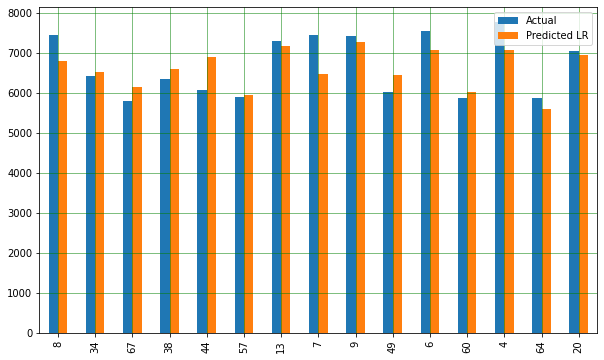

In [572]:
df_temp_lr = df_temp_lr.head(30)
df_temp_lr.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [573]:
score_lr=r2_score(y_test,y_pred_lr)
print('r2 score LR',score_lr)

r2 score LR 0.5855878454246608


In [574]:
diff=np.absolute(y_test-y_pred_lr)
MRE=diff/y_test
MMRE_list_regression=np.mean(MRE)

In [575]:
print('MMRE LR =',MMRE_list_regression)

MMRE LR = 0.05503514718868669


In [576]:
MMRE_list_lr=[]
for i in np.arange(1,4):   
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    diff=np.absolute(y_test-y_pred_lr)
    MRE=diff/y_test
    MMRE_list_regression=np.mean(MRE)
    MMRE_list_lr.append(MMRE_list_regression)

In [577]:
MMRE_list_lr

[0.05503514718868669, 0.05503514718868669, 0.05503514718868669]

##DECISION TREE

In [578]:
#DT
from sklearn.tree import DecisionTreeRegressor 
model_tree = DecisionTreeRegressor(random_state = 0) 
model_tree.fit(X_train,y_train)
y_pred_dt=model_tree.predict(X_test)

In [579]:
df_temp_dt = pd.DataFrame({'Actual': y_test, 'Predicted DT': y_pred_dt})
df_temp_dt.head()

,Actual,Predicted DT
8,7449,7365.0
34,6416,6360.0
67,5791,5993.0
38,6337,6433.0
44,6062,6173.0


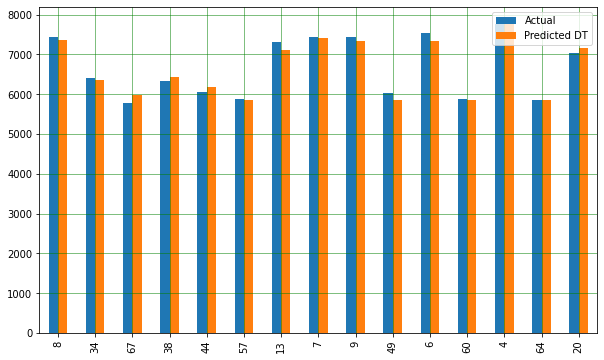

In [580]:
df_temp_dt = df_temp_dt.head(30)
df_temp_dt.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [581]:
# predicting the accuracy score
score_dt=r2_score(y_test,y_pred_dt)
print('r2 score dt',score_dt)

r2 score dt 0.9753281037382803


In [582]:
diff_dt=np.absolute(y_test-y_pred_dt)
MRE=diff_dt/y_test
MMRE_dt=np.mean(MRE)

In [583]:
MMRE_dt_list=[]
for i in np.arange(1,4):   
    model_dt = DecisionTreeRegressor(random_state = 0)
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    diff_dt=np.absolute(y_test-y_pred_dt)
    MRE=diff_dt/y_test
    MMRE=np.mean(MRE)
    MMRE_dt_list.append(MMRE)

In [584]:
print('MMRE DT =',MMRE_dt)

MMRE DT = 0.014241098531811606


##Adaboost

In [585]:
from sklearn.ensemble import AdaBoostRegressor

In [586]:
DTR=DecisionTreeRegressor(max_depth=30)
RegModel = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)

In [587]:
AB=RegModel.fit(X_train,y_train)
prediction_AB=AB.predict(X_test)

In [588]:
df_temp_AB = pd.DataFrame({'Actual': y_test, 'Predicted AB': prediction_AB})
df_temp_AB.head()

,Actual,Predicted AB
8,7449,7365.0
34,6416,6360.0
67,5791,5993.0
38,6337,6433.0
44,6062,6360.0


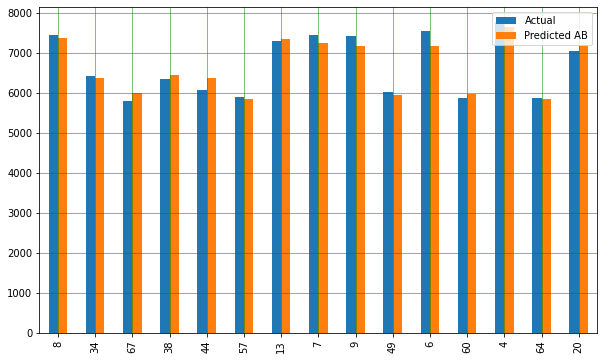

In [589]:
df_temp_AB = df_temp_AB.head(30)
df_temp_AB.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [590]:
# predicting the accuracy score
score_ab=r2_score(y_test,prediction_AB)
print('r2 score gbr',score_ab)

r2 score gbr 0.944492199015454


In [591]:
diff_AB=np.absolute(y_test-prediction_AB)
MRE_AB=diff_AB/y_test
MMRE_AB=np.mean(MRE_AB)

In [592]:
MMRE_list_AB=[]
for i in np.arange(1,4):  
    DTR=DecisionTreeRegressor(max_depth=30)
    RegModel = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)
    AB=RegModel.fit(X_train,y_train)
    prediction_AB=AB.predict(X_test)
    diff_AB=np.absolute(y_test-prediction_AB)
    MRE_AB=diff_AB/y_test
    MMRE_AB=np.mean(MRE_AB)
    MMRE_list_AB.append(MMRE_AB)

In [593]:
print('MMRE AB =',MMRE_AB)

MMRE AB = 0.02120615985469339


##Gradient Boosting

In [594]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


In [595]:
GBR=GradientBoostingRegressor()
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)

In [596]:
# search.fit(X_train,y_train)
# search.best_params_

In [597]:
gbr_params = {'learning_rate': 0.1,
              'max_depth': 4,
              'n_estimators': 1000,
              'random_state': 1,
              'subsample': 0.75,
              'loss' : 'huber'}

In [598]:
gbr = GradientBoostingRegressor(**gbr_params)

In [599]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=4, n_estimators=1000,
                          random_state=1, subsample=0.75)

In [600]:
gbr_predictions = gbr.predict(X_test) 

In [601]:
df_temp_gbr = pd.DataFrame({'Actual': y_test, 'Predicted GBR': gbr_predictions})
df_temp_gbr.head()

,Actual,Predicted GBR
8,7449,7512.958260
34,6416,6386.366481
67,5791,5974.510106
38,6337,6432.999868
44,6062,6247.356964


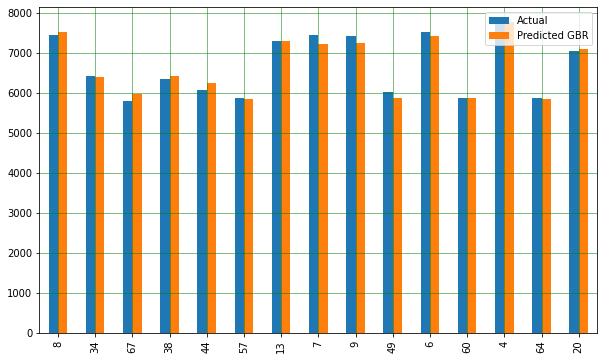

In [602]:
df_temp_gbr = df_temp_gbr.head(30)
df_temp_gbr.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [603]:
# predicting the accuracy score
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))

Model Accuracy: 0.975


In [604]:
diff_mre=np.absolute(y_test-gbr_predictions)
MRE_dif_gbr=diff_mre/y_test
MMRE_gbr=np.mean(MRE_dif_gbr)

In [605]:
print('MMRE GBR =',MMRE_gbr)

MMRE GBR = 0.01343380564252512


In [606]:
MMRE_gbr_list=[]
for i in np.arange(1,4):   
    gbr = GradientBoostingRegressor(n_estimators = 1000,
          max_depth = 4,
          random_state = 1,
          learning_rate = 1.0,
          subsample = 0.75,
          loss = 'huber')
    gbr.fit(X_train, y_train)
    y_pred_gbr = gbr.predict(X_test) 
    diff_mre=np.absolute(y_test-y_pred_gbr)
    MRE_dif=diff_mre/y_test
    MMRE_gbr_mean=np.mean(MRE_dif)
    MMRE_gbr_list.append(MMRE_gbr_mean)

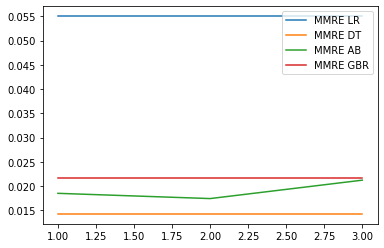

In [607]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,4)

plt.plot(x, MMRE_list_lr)
plt.plot(x, MMRE_dt_list)
plt.plot(x, MMRE_list_AB)
plt.plot(x, MMRE_gbr_list)

plt.legend(['MMRE LR','MMRE DT','MMRE AB', 'MMRE GBR'], loc='upper right')

plt.show()

In [608]:
MMRE_gbr

0.01343380564252512

In [609]:
import plotly.graph_objects as go

colors = ['lightslategray',] * 4
colors[3] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=['MMRE LR','MMRE DT','MMRE AB', 'MMRE GBR'],
    y=[MMRE_list_regression, MMRE_dt, MMRE_AB, MMRE_gbr],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Hasil')

In [610]:
import pickle

In [611]:
with open('gbr_pred_rb','wb') as f:
    pickle.dump(gbr,f)

In [612]:
with open('ab_rb','wb') as f:
    pickle.dump(AB,f)

In [613]:
with open('dt_rb','wb') as f:
    pickle.dump(model_tree,f)